#Task 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df = pd.read_csv('/content/complaints-2025-04-12_09_24.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/25/25,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,WV,25962,NaN,NaN,Web,03/25/25,In progress,Yes,NaN,12629310
1,03/15/25,Credit card,General-purpose credit card or charge card,Getting a credit card,Sent card you never applied for,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,MO,64089,NaN,NaN,Web,03/15/25,Closed with non-monetary relief,Yes,NaN,12500433
2,03/28/25,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,NaN,NaN,"HUNTINGTON NATIONAL BANK, THE",WI,54537,NaN,NaN,Web,03/28/25,Closed with explanation,Yes,NaN,12711691
3,03/06/25,Credit card,General-purpose credit card or charge card,"Advertising and marketing, including promotion...",Didn't receive advertised or promotional terms,NaN,NaN,AMERICAN EXPRESS COMPANY,NJ,08540,NaN,NaN,Web,03/06/25,Closed with explanation,Yes,NaN,12350502
4,02/03/25,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,My Bank of America Visa credit card ending in ...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",IL,60622,NaN,Consent provided,Web,02/03/25,Closed with explanation,Yes,NaN,11909596


In [ ]:
df.shape

(209147, 18)

In [ ]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [ ]:
df['Issue'].unique()

array(['Incorrect information on your report', 'Getting a credit card',
       'Problem with a purchase shown on your statement',
       'Advertising and marketing, including promotional offers',
       'Problem when making payments',
       'Other features, terms, or problems', 'Fees or interest',
       'Closing your account', 'Trouble using your card',
       "Problem with a company's investigation into an existing problem",
       'Other', 'Unable to get your credit report or credit score',
       'Customer service / Customer relations',
       'Improper use of your report', 'Struggling to pay your bill',
       'Problem with fraud alerts or security freezes',
       'Credit line increase/decrease', 'Balance transfer',
       'Billing disputes', 'Identity theft / Fraud / Embezzlement',
       'Credit monitoring or identity theft protection services',
       'Payoff process', 'Advertising and marketing',
       'Unsolicited issuance of credit card', 'Delinquent account',
       'Oth

In [ ]:
df['Sub-issue'].unique()

array(['Account status incorrect', 'Sent card you never applied for',
       "Credit card company isn't resolving a dispute about a purchase on your statement",
       "Didn't receive advertised or promotional terms",
       'You never received your bill or did not know a payment was due',
       'Problem with convenience check', 'Charged too much interest',
       'Other problem', 'Company closed your account',
       "Can't use card to make purchases",
       'Card was charged for something you did not purchase with the card',
       'Card opened without my consent or knowledge',
       'Problem during payment process',
       'Information is missing that should be on the report',
       'Was not notified of investigation status or results', nan,
       'Difficulty submitting a dispute or getting information about a dispute over the phone',
       'Other problem getting your report or credit score',
       'Overcharged for something you did purchase with the card',
       'Account in

In [ ]:
# Define UDAAP-related keywords in Issue
udaap_issues = [
    'Incorrect information on your report',
    'Getting a credit card',
    'Problem with a purchase shown on your statement',
    'Advertising and marketing, including promotional offers',
    'Problem when making payments',
    'Other features, terms, or problems',
    'Fees or interest',
    'Closing your account',
    'Trouble using your card',
    "Problem with a company's investigation into an existing problem",
    'Unable to get your credit report or credit score',
    'Improper use of your report',
    'Credit monitoring or identity theft protection services',
    'Credit reporting',
    'Advertising and marketing',
    'Unsolicited issuance of credit card',
    'Credit card protection / Debt protection',
    'Privacy',
    'Transaction issue',
    'Credit determination',
    'Billing statement',
    'Application processing delay',
    'Convenience checks',
    'Cash advance',
]


# Define UDAAP-related keywords in Sub-Issue
udaap_subissues = [
    'Account status incorrect',
    'Sent card you never applied for',
    "Credit card company isn't resolving a dispute about a purchase on your statement",
    "Didn't receive advertised or promotional terms",
    'You never received your bill or did not know a payment was due',
    'Problem with convenience check',
    'Charged too much interest',
    'Other problem',
    'Company closed your account',
    "Can't use card to make purchases",
    'Card was charged for something you did not purchase with the card',
    'Card opened without my consent or knowledge',
    'Problem during payment process',
    'Information is missing that should be on the report',
    'Was not notified of investigation status or results',
    'Difficulty submitting a dispute or getting information about a dispute over the phone',
    'Other problem getting your report or credit score',
    'Overcharged for something you did purchase with the card',
    'Account information incorrect',
    'Problem with fees',
    "Credit card company won't increase or decrease your credit limit",
    'Privacy issues',
    'Their investigation did not fix an error on your report',
    'Add-on products and services',
    "Credit inquiries on your report that you don't recognize",
    'Problem with rewards from credit card',
    'Information belongs to someone else',
    "Can't close your account",
    'Confusing or misleading advertising about the credit card',
    'Problem getting a working replacement card',
    'Delay in processing application',
    'Unexpected increase in interest rate',
    'Public record information inaccurate',
    "Credit card company won't work with you while you're going through financial hardship",
    'Investigation took more than 30 days',
    'Reporting company used your report improperly',
    'Personal information incorrect',
    'Old information reappears or never goes away',
    'Problem lowering your monthly payments',
    'Billing dispute for services',
    'Problem with personal statement of dispute',
    'Credit card company forcing arbitration',
    'Received unwanted marketing or advertising',
    'Problem with cash advances',
    'Problem canceling credit monitoring or identify theft protection service',
    "Didn't receive services that were advertised",
    'Report provided to employer without your written authorization',
    'Problem getting your free annual credit report',
    'Problem with product or service terms changing',
    'Received unsolicited financial product or insurance offers after opting out',
]


# Filter the DataFrame to keep only rows where either column matches
df = df[
    df['Sub-issue'].isin(udaap_subissues) |
    df['Issue'].isin(udaap_issues)
]

In [ ]:
df.shape

(138789, 18)

task 1

In [ ]:
df['Date received'] = pd.to_datetime(df['Date received'])

<ipython-input-9-e00c09636247>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date received'] = pd.to_datetime(df['Date received'])


In [ ]:
# Today's date and 2 years ago
today = pd.to_datetime('today').normalize()
two_years_ago = today - pd.DateOffset(years=2)

past_2_years_df = df[df['Date received'] >= two_years_ago]

In [ ]:
past_2_years_df.shape

(119787, 18)

In [ ]:
daily_trend = past_2_years_df.groupby('Date received').size().reset_index(name='complaint_count')

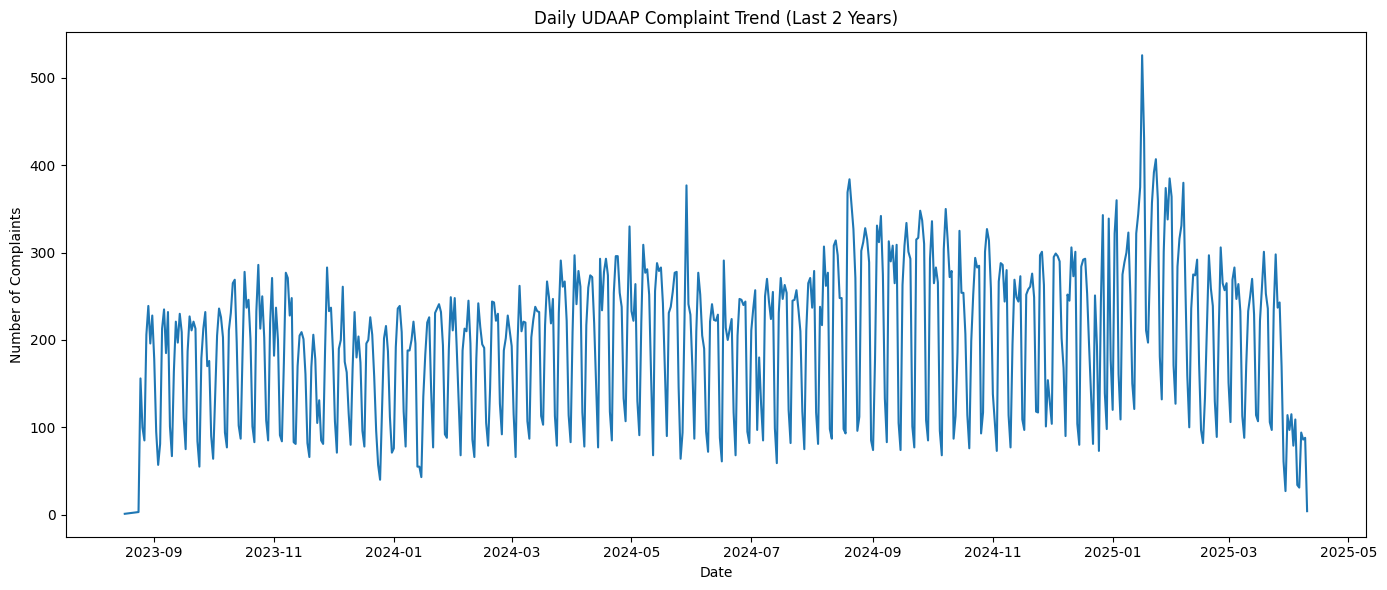

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_trend, x='Date received', y='complaint_count')
plt.title('Daily UDAAP Complaint Trend (Last 2 Years)')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.tight_layout()
plt.show()


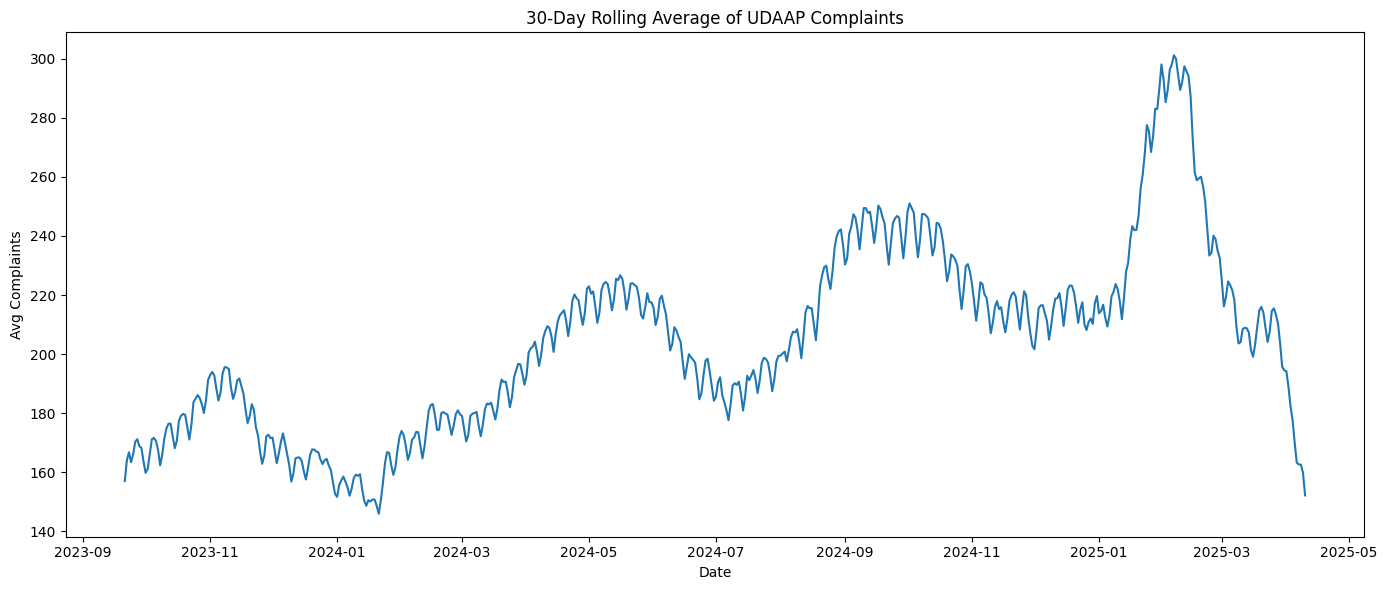

In [ ]:
daily_trend['rolling_30'] = daily_trend['complaint_count'].rolling(window=30).mean()

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_trend, x='Date received', y='rolling_30')
plt.title('30-Day Rolling Average of UDAAP Complaints')
plt.xlabel('Date')
plt.ylabel('Avg Complaints')
plt.tight_layout()
plt.show()

<ipython-input-15-f6bf70d8900d>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = past_2_years_df.resample('M', on='Date received').size()


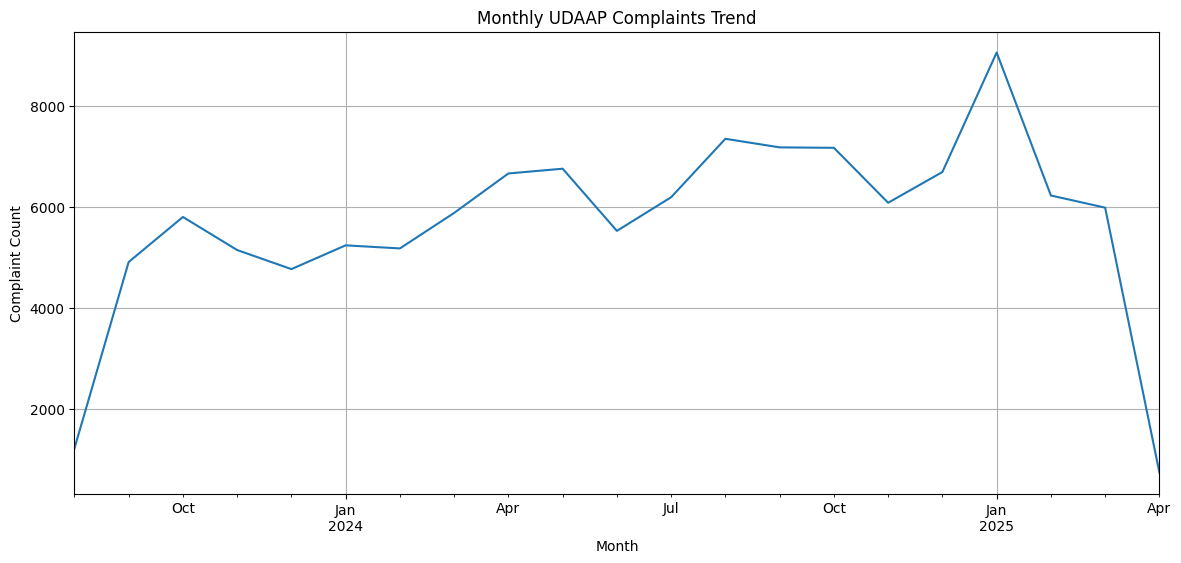

In [ ]:
monthly_trend = past_2_years_df.resample('M', on='Date received').size()

monthly_trend.plot(kind='line', figsize=(14, 6), title='Monthly UDAAP Complaints Trend')
plt.xlabel('Month')
plt.ylabel('Complaint Count')
plt.grid(True)
plt.show()

In [ ]:
# Count daily complaints
daily_counts = past_2_years_df.groupby('Date received').size().reset_index(name='complaint_count')

# Create numeric time feature: number of days since the start
daily_counts['days_since_start'] = (daily_counts['Date received'] - daily_counts['Date received'].min()).dt.days

# Prepare X and y
X = daily_counts[['days_since_start']]
y = daily_counts['complaint_count']

# Fit Linear Regression
model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

print(f"Slope: {slope}")
print(f"R-squared: {r_squared}")

Slope: 0.11041589137500457
R-squared: 0.04948805141753232


In [ ]:
# Calculate p-value using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = stats.linregress(daily_counts['days_since_start'], y)

print(f"Slope: {slope}")
print(f"P-value: {p_value}")

Slope: 0.11041589137500452
P-value: 3.950310317091162e-08


In [ ]:
p_value < 0.05

np.True_

In [ ]:
# plt.figure(figsize=(12, 6))
# sns.scatterplot(x='days_since_start', y='complaint_count', data=daily_counts, alpha=0.5)
# sns.lineplot(x='days_since_start', y=model.predict(X), color='red', label='Trend Line')
# plt.title("Trend of UDAAP Complaints Over Time")
# plt.xlabel("Days Since Start")
# plt.ylabel("Complaint Count")
# plt.legend()
# plt.tight_layout()
# plt.show()

#Task 2

In [ ]:
df.shape

(138789, 18)

In [ ]:
df = past_2_years_df.sort_values('Date received')
df['day_number'] = (df['Date received'] - df['Date received'].min()).dt.days

In [ ]:
daily_complaints = df.groupby(['Company', 'day_number']).size().reset_index(name='count')

In [ ]:
slopes = []

for company in daily_complaints['Company'].unique():
    subset = daily_complaints[daily_complaints['Company'] == company]

    if len(subset) > 30:  # avoid unstable estimates from too few points
        X = subset['day_number'].values.reshape(-1, 1)
        y = subset['count'].values

        model = LinearRegression()
        model.fit(X, y)

        slope = model.coef_[0]
        slopes.append({'Company': company, 'Growth Rate': slope})


In [ ]:
slopes_df = pd.DataFrame(slopes)
top_growth = slopes_df.sort_values(by='Growth Rate', ascending=False).head(10)
print(top_growth)

                                   Company  Growth Rate
26                           EQUIFAX, INC.     0.020156
63  TRANSUNION INTERMEDIATE HOLDINGS, INC.     0.019346
27     Experian Information Solutions Inc.     0.016462
13       CAPITAL ONE FINANCIAL CORPORATION     0.012330
14                          CITIBANK, N.A.     0.010681
59                     SYNCHRONY FINANCIAL     0.006696
34                  GOLDMAN SACHS BANK USA     0.003987
45               NAVY FEDERAL CREDIT UNION     0.003004
8    BANK OF AMERICA, NATIONAL ASSOCIATION     0.002689
12          Bread Financial Holdings, Inc.     0.002544


<ipython-input-25-2ec10f80986b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_growth, x='Growth Rate', y='Company', palette='rocket')


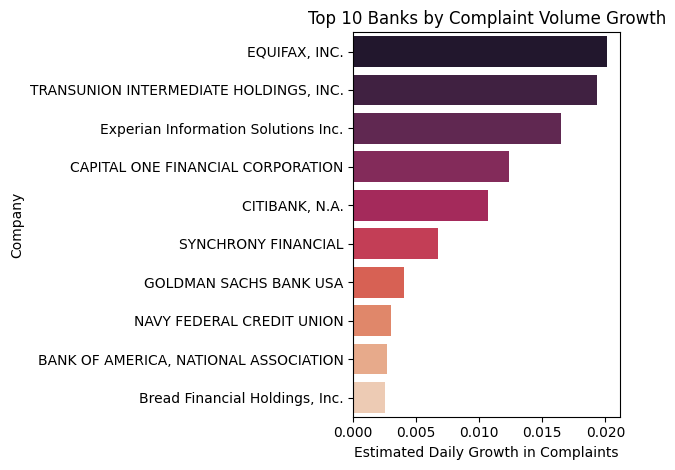

In [ ]:
sns.barplot(data=top_growth, x='Growth Rate', y='Company', palette='rocket')
plt.title('Top 10 Banks by Complaint Volume Growth')
plt.xlabel('Estimated Daily Growth in Complaints')
plt.ylabel('Company')
plt.tight_layout()
plt.show()


#Task 3

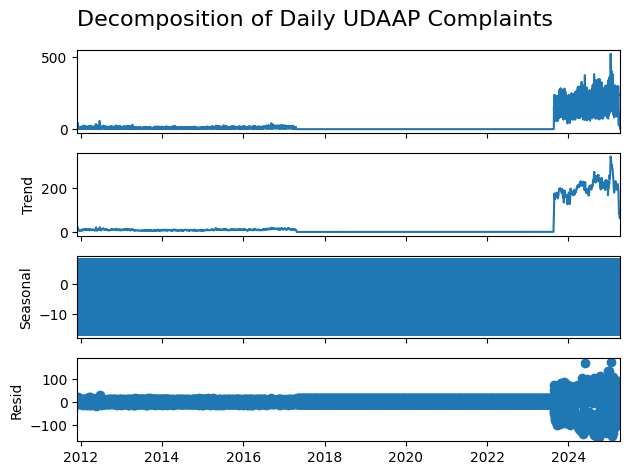

In [ ]:
df['Date received'] = pd.to_datetime(df['Date received'])
daily_counts = df.groupby('Date received').size()
daily_counts = daily_counts.asfreq('D')  # Set frequency to daily
daily_counts = daily_counts.fillna(0)

decomposition = seasonal_decompose(daily_counts, model='additive', period=7)

decomposition.plot()
plt.suptitle("Decomposition of Daily UDAAP Complaints", fontsize=16)
plt.tight_layout()
plt.show()


1. Seasonality
The Seasonal component (3rd panel) shows a strong and consistent cyclical pattern.

The oscillations are very regular, indicating a daily or weekly recurring pattern in complaints.

The amplitude (peak-to-trough range) of the seasonal variation appears stable over time, suggesting a predictable seasonal influence.

2. Trend
The Trend component (2nd panel) reveals a gradual upward slope for most of the period, indicating a general increase in complaint volume.

There’s a noticeable spike towards the end of the series, followed by a sharp drop, possibly due to an event or change in reporting.

3. Residuals (Noise)
The Resid component (4th panel) shows the random fluctuations left after removing the trend and seasonality.

There's a cluster of large residuals (outliers) near the end of the series, which suggests irregular or unexpected events that the trend/seasonality models couldn’t explain.

Apart from those spikes, residuals are mostly centered around zero, which is what you'd expect from white noise.

In [ ]:
deseasonalized = daily_counts - decomposition.seasonal
detrended = deseasonalized.diff().dropna()

NameError: name 'daily_counts' is not defined

In [ ]:
# from scipy.stats import zscore

# # Step 1: Ensure daily_counts is a pandas Series
# # (assumed to be: complaints per day with Date as index)
# daily_counts = df.groupby('Date received').size()
# daily_counts = daily_counts.asfreq('D')  # ensure proper frequency
# daily_counts = daily_counts.fillna(0)    # fill missing days with 0

# # Step 2: Compute z-scores
# z_scores = zscore(daily_counts)

# # Step 3: Set a threshold (common: |z| > 3)
# threshold = 3
# outliers = np.where(np.abs(z_scores) > threshold)[0]

# # Step 4: Extract the actual outlier dates and values
# outlier_dates = daily_counts.iloc[outliers].index
# outlier_values = daily_counts.iloc[outliers].values

# # Step 5: Plot the outliers on the time series
# plt.figure(figsize=(14, 6))
# plt.plot(daily_counts, label='Daily Complaints')
# plt.scatter(outlier_dates, outlier_values, color='red', label='Outliers')
# plt.title('Outlier Detection in Daily UDAAP Complaints (Z-score method)')
# plt.xlabel('Date')
# plt.ylabel('Number of Complaints')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
result = adfuller(daily_counts)

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: -2.213029211064173
p-value: 0.20155063572959758
Critical Values: {'1%': -3.4316993019432824, '5%': -2.862136241466824, '10%': -2.5670873807578265}


In [ ]:
result[1] < 0.05

False

so, Our series is stationary

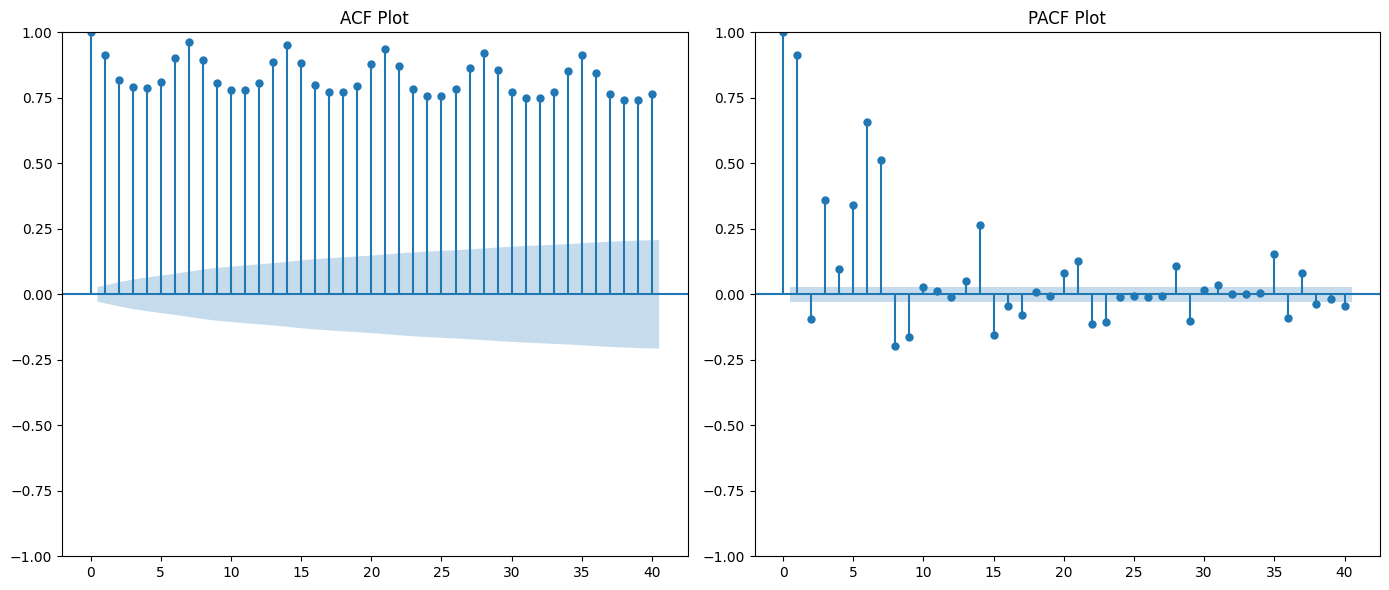

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plot_acf(daily_counts, lags=40, ax=plt.gca())
plt.title('ACF Plot')
plt.subplot(1, 2, 2)
plot_pacf(daily_counts, lags=40, ax=plt.gca())
plt.title('PACF Plot')
plt.tight_layout()
plt.show()


In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.1 MB/s eta 0:00:00


In [ ]:
!pip uninstall -y numpy pmdarima
!pip install numpy==1.24.4
!pip install pmdarima --no-cache-dir

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 53.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
tensorflow 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.6 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade numpy pmdarima --no-cache-dir --force-reinstall

In [ ]:
import pmdarima as pm

model = pm.auto_arima(daily_counts, seasonal=False, trace=True,
                      error_action='ignore', suppress_warnings=True,
                      stepwise=True)

print(model.summary())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=43890.917, Time=13.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=46960.362, Time=0.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=46952.060, Time=0.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=46921.793, Time=2.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=46958.362, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=44919.685, Time=7.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=44579.638, Time=3.85 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=44576.352, Time=7.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=42792.452, Time=13.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=44851.782, Time=6.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=42770.350, Time=13.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=41593.890, Time=15.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=41950.201, Time=14.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=41086.708, Time=15.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=41175.496, Time=15.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=40640.171, Time=20.97 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=41257.913, Time=17.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,5)(0,0,0)[0] intercept   : AIC=40369.115, Time=24.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,5)(0,0,0)[0] intercept   : AIC=40305.972, Time=21.77 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,5)(0,0,0)[0] intercept   : AIC=42187.993, Time=19.98 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=42441.503, Time=19.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,5)(0,0,0)[0]             : AIC=40310.242, Time=8.57 sec

Best model:  ARIMA(4,1,5)(0,0,0)[0] intercept
Total fit time: 261.700 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4880
Model:               SARIMAX(4, 1, 5)   Log Likelihood              -20141.986
Date:                Sat, 19 Apr 2025   AIC                          40305.972
Time:                        09:16:08   BIC                          40377.392
Sample:                    12-01-2011   HQIC                         40331.035
                         - 04-10-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0219      0.123     -0.178      0.858      -0.2

In [ ]:
seasonal_model = pm.auto_arima(daily_counts,
                               seasonal=True,
                               m=7,   # 7 for weekly seasonality; change based on decomposition
                               trace=True,
                               error_action='ignore',
                               suppress_warnings=True,
                               stepwise=True)

print(seasonal_model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=40028.595, Time=31.05 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=46960.362, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=42391.677, Time=6.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=44302.802, Time=4.09 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=46958.362, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=43016.484, Time=11.91 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=41190.842, Time=13.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=40031.435, Time=37.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=40009.275, Time=40.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=42243.149, Time=25.51 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=40042.594, Time=39.83 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,2)[7] intercept   : AIC=40030.052, Time=30.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,2)[7] intercept   : AIC=40235.784, Time=39.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,2)[7] intercept   : AIC=39980.232, Time=41.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,2)[7] intercept   : AIC=42241.472, Time=23.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,1)[7] intercept   : AIC=39999.968, Time=19.90 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(2,0,2)[7] intercept   : AIC=39991.361, Time=41.82 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,1)[7] intercept   : AIC=43032.498, Time=11.80 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(2,0,1)[7] intercept   : AIC=39979.871, Time=38.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(2,0,0)[7] intercept   : AIC=40624.363, Time=33.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,0)[7] intercept   : AIC=41187.815, Time=16.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(2,0,1)[7] intercept   : AIC=40104.851, Time=49.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(2,0,1)[7] intercept   : AIC=inf, Time=47.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(2,0,1)[7] intercept   : AIC=inf, Time=53.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,0,1)[7] intercept   : AIC=40228.856, Time=42.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(2,0,1)[7] intercept   : AIC=40045.453, Time=39.52 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(2,0,1)[7] intercept   : AIC=40152.497, Time=52.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(2,0,1)[7] intercept   : AIC=39917.870, Time=51.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(1,0,1)[7] intercept   : AIC=inf, Time=28.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(2,0,0)[7] intercept   : AIC=40616.278, Time=52.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(2,0,2)[7] intercept   : AIC=39880.873, Time=53.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(1,0,2)[7] intercept   : AIC=39917.499, Time=52.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(2,0,2)[7] intercept   : AIC=inf, Time=64.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(2,0,2)[7] intercept   : AIC=39976.608, Time=56.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(2,0,2)[7] intercept   : AIC=39849.017, Time=54.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(1,0,2)[7] intercept   : AIC=39824.794, Time=56.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(0,0,2)[7] intercept   : AIC=40994.334, Time=46.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(1,0,1)[7] intercept   : AIC=39859.874, Time=32.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(0,0,1)[7] intercept   : AIC=41077.694, Time=26.42 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(2,0,1)[7] intercept   : AIC=39822.336, Time=50.69 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(2,0,0)[7] intercept   : AIC=40517.249, Time=52.85 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(1,0,0)[7] intercept   : AIC=41129.483, Time=33.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(2,0,1)[7] intercept   : AIC=39851.814, Time=48.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,4)(2,0,1)[7] intercept   : AIC=39823.698, Time=54.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(2,0,1)[7] intercept   : AIC=39855.167, Time=59.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(2,0,1)[7]             : AIC=39816.937, Time=21.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(1,0,1)[7]             : AIC=39858.141, Time=14.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(2,0,0)[7]             : AIC=40510.050, Time=21.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(2,0,2)[7]             : AIC=39849.402, Time=23.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(1,0,0)[7]             : AIC=41140.245, Time=14.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(1,0,2)[7]             : AIC=39823.349, Time=22.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(2,0,1)[7]             : AIC=39912.783, Time=22.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(2,0,1)[7]             : AIC=39850.026, Time=22.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,4)(2,0,1)[7]             : AIC=39821.643, Time=22.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(2,0,1)[7]             : AIC=39971.713, Time=23.46 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(2,0,1)[7]             : AIC=39871.027, Time=26.70 sec

Best model:  ARIMA(5,1,3)(2,0,1)[7]          
Total fit time: 1897.647 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                 4880
Model:             SARIMAX(5, 1, 3)x(2, 0, [1], 7)   Log Likelihood              -19896.468
Date:                             Sat, 19 Apr 2025   AIC                          39816.937
Time:                                     09:49:26   BIC                          39894.849
Sample:                                 12-01-2011   HQIC                         39844.277
                                      - 04-10-2025                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

In [ ]:
n_periods = 30
forecast, conf_int = seasonal_model.predict(n_periods=n_periods, return_conf_int=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


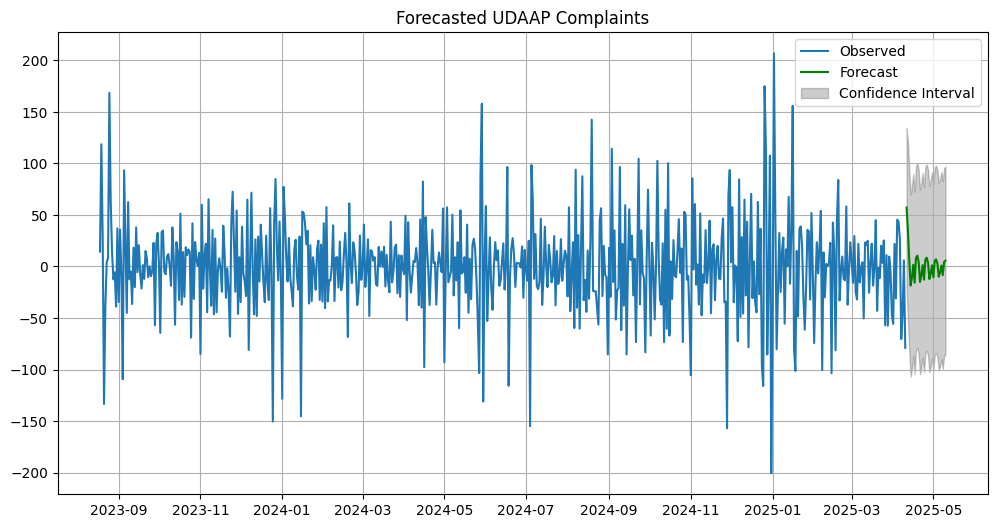

In [ ]:
# Construct future dates
future_dates = pd.date_range(start=detrended.index[-1], periods=n_periods+1, freq='D')[1:]

# Plot
plt.figure(figsize=(12,6))
plt.plot(detrended.index, detrended, label='Observed')
plt.plot(future_dates, forecast, color='green', label='Forecast')
plt.fill_between(future_dates, conf_int[:, 0], conf_int[:, 1], color='k', alpha=0.2, label='Confidence Interval')
plt.title('Forecasted UDAAP Complaints')
plt.legend()
plt.grid()
plt.show()


In [ ]:
Inf_une = pd.read_excel("/content/inflation_unemployment.xlsx")

In [ ]:
# Clean column names
Inf_une.columns = Inf_une.columns.str.replace(r'\\n|\\t|\n|\t', '', regex=True).str.strip()


In [ ]:
Inf_une.head()

,Date,Unem-ploymentrate,CPIinflationrate
0,Q1 2000,4.0,4.0
1,Q2 2000,3.9,3.2
2,Q3 2000,4.0,3.7
3,Q4 2000,3.9,2.9
4,Q1 2001,4.2,3.9


In [ ]:
Inf_une = Inf_une[Inf_une['Date'].isin([ "Q3 2023", "Q4 2023", "Q1 2024", "Q2 2024", "Q3 2024",
    "Q4 2024", "Q1 2025", "Q2 2025"
])]


In [ ]:
Inf_une.reset_index(inplace=True)

In [ ]:
Inf_une.drop()

,index,Date,Unem-ploymentrate,CPIinflationrate
0,94,Q3 2023,3.7,3.4
1,95,Q4 2023,3.8,2.7
2,96,Q1 2024,3.8,3.8
3,97,Q2 2024,4.0,2.8
4,98,Q3 2024,4.2,1.2
5,99,Q4 2024,4.1,2.7


In [ ]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,day_number
83578,2023-08-17,Credit card,General-purpose credit card or charge card,Fees or interest,Problem with fees,NaN,NaN,JPMORGAN CHASE & CO.,CA,93401,NaN,NaN,Referral,08/30/23,Closed with explanation,Yes,NaN,7476202,0
132335,2023-08-24,Credit card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11230,NaN,NaN,Referral,08/25/23,Closed with explanation,Yes,NaN,7457201,7
17959,2023-08-24,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,NaN,NaN,Comerica,MO,63112,NaN,NaN,Referral,09/06/23,Closed with explanation,Yes,NaN,7510127,7
128370,2023-08-24,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,NaN,Company has responded to the consumer and the ...,SYNCHRONY FINANCIAL,CA,95425,NaN,NaN,Referral,09/07/23,Closed with explanation,Yes,NaN,7508701,7
166083,2023-08-25,Credit card,General-purpose credit card or charge card,Getting a credit card,Card opened without my consent or knowledge,"On XX/XX/23, Someone applied for JPMCB w/o my ...",NaN,JPMORGAN CHASE & CO.,IL,62234,Servicemember,Consent provided,Web,08/25/23,Closed with explanation,Yes,NaN,7454417,8


In [ ]:
df.shape

(119787, 19)

In [ ]:
# Convert to datetime
df['Date received'] = pd.to_datetime(df['Date received'])

# Set as index
df.set_index('Date received', inplace=True)

# Group by quarter and count number of complaints
quarterly_complaints = df.resample('Q').size().reset_index(name='No. of Complaints')

# Optionally, extract quarter in a readable format
quarterly_complaints['Quarter'] = quarterly_complaints['Date received'].dt.to_period('Q').astype(str)

# Reorder columns
quarterly_complaints = quarterly_complaints[['Quarter', 'No. of Complaints']]


<ipython-input-182-4cc75779a531>:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_complaints = df.resample('Q').size().reset_index(name='No. of Complaints')


In [ ]:
quarterly_complaints = quarterly_complaints

,Quarter,No. of Complaints
0,2023Q3,6123
1,2023Q4,15718
2,2024Q1,16302
3,2024Q2,18951
4,2024Q3,20728
5,2024Q4,19951
6,2025Q1,21277
7,2025Q2,737


In [ ]:
Inf_une['No. of Complaints'] = quarterly_complaints['No. of Complaints']

<ipython-input-190-9c5e0e17b172>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Inf_une['No. of Complaints'] = quarterly_complaints['No. of Complaints']


In [ ]:
Inf_une['Quarter'] = Inf_une['Date']

<ipython-input-193-8403fc2ec6d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Inf_une['Quarter'] = Inf_une['Date']


In [ ]:
Inf_une.drop(columns=['Date','index'], inplace=True)

<ipython-input-197-b0b2fd09583e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Inf_une.drop(columns=['Date','index'], inplace=True)


In [ ]:
Inf_une

,Unem-ploymentrate,CPIinflationrate,No. of Complaints,Quarter
0,3.7,3.4,6123,Q3 2023
1,3.8,2.7,15718,Q4 2023
2,3.8,3.8,16302,Q1 2024
3,4.0,2.8,18951,Q2 2024
4,4.2,1.2,20728,Q3 2024
5,4.1,2.7,19951,Q4 2024


In [ ]:
correlation = Inf_une[['Unem-ploymentrate', 'CPIinflationrate', 'No. of Complaints']].corr()
print(correlation)

                   Unem-ploymentrate  CPIinflationrate  No. of Complaints
Unem-ploymentrate           1.000000         -0.806543           0.837684
CPIinflationrate           -0.806543          1.000000          -0.567359
No. of Complaints           0.837684         -0.567359           1.000000


Unemployment Rate vs. Complaints:
🔼 Strong positive correlation (0.838)
👉 This suggests that as unemployment increases, the number of complaints tends to rise. This makes intuitive sense—economic distress can lead to more dissatisfaction or disputes, especially in financial sectors.

Inflation Rate vs. Complaints:
🔽 Moderate negative correlation (-0.567)
👉 This means that as inflation increases, the number of complaints tends to decrease, though the relationship is weaker. This could be due to indirect effects or other macroeconomic compensations.

Unemployment vs. Inflation:
🔁 Strong negative correlation (-0.807)
👉 Reflects the classic Phillips Curve relationship—as unemployment falls, inflation tends to rise, and vice versa.

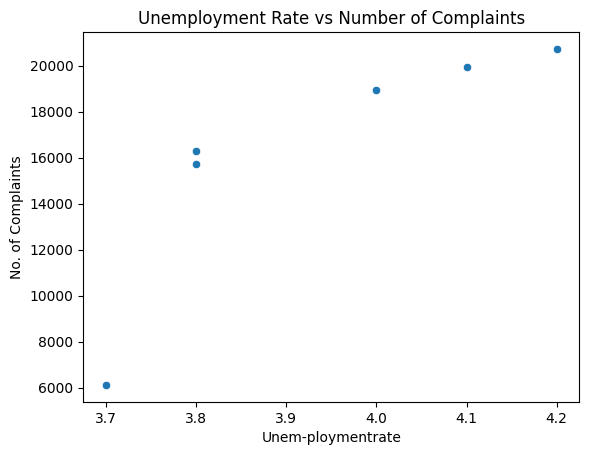

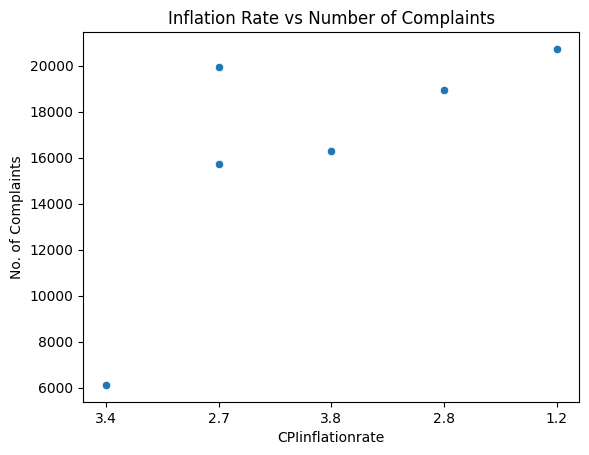

In [ ]:
# Unemployment vs Complaints
sns.scatterplot(data=Inf_une, x='Unemploymentrate', y='No. of Complaints')
plt.title('Unemployment Rate vs Number of Complaints')
plt.show()

# Inflation vs Complaints
sns.scatterplot(data=Inf_une, x='CPI inflationrate', y='No. of Complaints')
plt.title('Inflation Rate vs Number of Complaints')
plt.show()

#Task 4

In [ ]:
# !pip install --upgrade numpy
# !pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 26.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 799.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━

In [ ]:
import tensorflow as tf
import re
from nltk.corpus import stopwords
import time
from tensorflow.python.layers.core import Dense
from tensorflow.python.ops.rnn_cell_impl import _zero_state_tensors
print('TensorFlow Version: {}'.format(tf.__version__))

TensorFlow Version: 2.18.0


In [ ]:
# Check number of null values
print("Null values before dropping:", df['Consumer complaint narrative'].isnull().sum())

# Drop rows where 'cleaned_complaints' is null
df = df.dropna(subset=['Consumer complaint narrative']).reset_index(drop=True)

# Verify removal
print("Null values after dropping:", df['Consumer complaint narrative'].isnull().sum())


Null values before dropping: 0
Null values after dropping: 0


In [ ]:
df.shape

(54440, 19)

In [ ]:
# Inspecting some of the Consumer complaint narrative
for i in range(5):
    print("Complaint #", i + 1)
    print(df['Consumer complaint narrative'].iloc[i])
    print()


Complaint # 1
On XX/XX/23, Someone applied for JPMCB w/o my knowledge.

Complaint # 2
See the attached documents. I want the bureau to start the investigation on these accounts that I am never late for but they're reporting me as late.

Complaint # 3
American Express has a platinum charge card of which I've never missed a payment. Because I'm not using the charge card as they completely desired but still within the legal scope of which I'm allotted per their contractual agreement they are financially squeezing the account causing various malicious and malinformed reports for example they're making it seem like I'm using 100 % of the borrowed some but it's because every time I make a payment they lower it. They also are declining charges because of this algorithm and refused to review it or let me speak to somebody about it. I'm following their contract to the t. That's in addition to they're double dipped interest fees that no one for some reason has claimed in a class action lawsuit b

In [ ]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [ ]:
def clean_text(text, remove_stopwords=True):
    '''Clean complaint text: lowercase, remove noise, digits, repeated chars, and extra spaces.'''

    import re
    from nltk.corpus import stopwords

    # Convert to lowercase and ensure it's a string
    text = str(text).lower()

    # Expand contractions
    text = text.split()
    new_text = []
    for word in text:
        if word in contractions:
            new_text.append(contractions[word])
        else:
            new_text.append(word)
    text = " ".join(new_text)

    # Remove URLs and HTML artifacts
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'<a href', ' ', text)
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'<br\s*/?>', ' ', text)

    # Remove brackets, symbols, punctuation, etc.
    text = re.sub(r'[\[\]\(\)\{\}\<\>]', ' ', text)
    text = re.sub(r'>', ' ', text)
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'\'', ' ', text)

    # Remove digits
    text = re.sub(r'\d+', '', text)

    # Remove repeated characters like "xxx"
    text = re.sub(r'\b(\w)\1{1,}\b', '', text)

    # Remove stopwords (optional)
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if w not in stops]
        text = " ".join(text)

    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [ ]:
df['cleaned_complaint'] = df['Consumer complaint narrative'].apply(lambda x: clean_text(x, remove_stopwords=False))

In [ ]:
# Inspecting some of the Consumer complaint narrative
for i in range(5):
    print("Complaint #", i + 1)
    print(df['cleaned_complaint'].iloc[i])
    print()


Complaint # 1
on someone applied for jpmcb w o my knowledge

Complaint # 2
see the attached documents i want the bureau to start the investigation on these accounts that i am never late for but they are reporting me as late

Complaint # 3
american express has a platinum charge card of which i have never missed a payment because i am not using the charge card as they completely desired but still within the legal scope of which i am allotted per their contractual agreement they are financially squeezing the account causing various malicious and malinformed reports for example they are making it seem like i am using of the borrowed some but it is because every time i make a payment they lower it they also are declining charges because of this algorithm and refused to review it or let me speak to somebody about it i am following their contract to the t that is in addition to they are double dipped interest fees that no one for some reason has claimed in a class action lawsuit but that is b

In [ ]:
# import nltk


# # Download stopwords
# nltk.download('stopwords')

# stop_words = set(stopwords.words('english'))

# def clean_text(text):
#     if isinstance(text, str):  # Check if the value is a string
#         # Remove non-alphabetic characters
#         text = re.sub(r'\W', ' ', text)
#         text = text.lower()
#         text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
#         return text
#     else:
#         return ""  # Return an empty string if it's not a string

# # Handle missing or non-string values by filling them with an empty string
# df['Consumer complaint narrative'] = df['Consumer complaint narrative'].fillna("")

# # Apply the cleaning function
# df['cleaned_complaints'] = df['Consumer complaint narrative'].apply(clean_text)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer(max_features=20, ngram_range=(1, 2))

# Apply the vectorizer to the cleaned complaints text
tfidf_matrix = vectorizer.fit_transform(df['cleaned_complaint'])

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Sum up the scores of each term across all documents
term_frequencies = tfidf_df.sum(axis=0).sort_values(ascending=False)

# Display the top 20 terms
print(term_frequencies.head(20))


the        19524.796774
to         15046.921402
and        13190.841389
my         11866.884478
of          8624.234261
on          8285.148005
that        7853.776157
was         7736.905387
this        7394.036331
credit      7274.487448
they        7100.090583
account     7064.169676
for         6683.244154
not         6598.743168
have        6344.033850
card        6246.826324
is          6231.374332
in          6056.294494
me          6029.714694
with        5093.098469
dtype: float64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorizing the complaints text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned_complaint'])

# Clustering using KMeans
num_clusters = 5  # You can adjust this based on your data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Getting the terms that are most associated with each cluster
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

# Displaying the top terms for each cluster
for i in range(num_clusters):
    print(f"Cluster {i+1}:")
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]  # Top 10 terms
    print("Top terms:", top_terms)


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7ddd316985e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.11/dist-packages/numpy.libs/libopenblas64_p-r0-15028c96

Cluster 1:
Top terms: ['credit', 'account', 'dispute', 'report', 'information', 'card', 'bank', 'consumer', 'accounts', 'company']
Cluster 2:
Top terms: ['card', 'credit', 'account', 'chase', 'bank', 'charges', 'did', 'called', 'fraud', 'told']
Cluster 3:
Top terms: ['payments', 'late', 'payment', 'account', 'consistently', 'accounts', 'remarks', 'usc', 'timely', 'update']
Cluster 4:
Top terms: ['start', 'documents', 'bureau', 'late', 'attached', 'investigation', 'want', 'accounts', 'reporting', 'account']
Cluster 5:
Top terms: ['payment', 'balance', 'account', 'fee', 'late', 'credit', 'pay', 'paid', 'card', 'bank']


In [ ]:
# Assuming 'Company' column is the bank name
top_themes_by_bank = {}

for bank in df['Company'].unique():
    bank_complaints = df[df['Company'] == bank]['cleaned_complaint']
    tfidf_matrix = vectorizer.fit_transform(bank_complaints)
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    term_frequencies = tfidf_df.sum(axis=0).sort_values(ascending=False)
    top_themes_by_bank[bank] = term_frequencies.head(10)

# Display top themes for each bank
for bank, themes in top_themes_by_bank.items():
    print(f"Top themes for {bank}:")
    print(themes)
    print("="*50)


Top themes for JPMORGAN CHASE & CO.:
chase       350.791151
credit      286.973736
card        277.737419
account     211.969441
bank        134.630170
did         122.973443
charges     119.849194
received    112.604356
called      111.291587
charge      109.044051
dtype: float64
Top themes for Experian Information Solutions Inc.:
late             302.149197
accounts         257.704362
account          255.149305
payments         214.591175
payment          184.709198
documents        182.456823
attached         180.045625
bureau           175.928657
investigation    175.051814
want             168.088109
dtype: float64
Top themes for AMERICAN EXPRESS COMPANY:
credit      187.145721
american    187.064195
express     186.207214
card        173.113785
amex        158.283887
account     143.489147
payment      97.425557
did          73.304373
charge       68.792449
charges      68.538294
dtype: float64
Top themes for EQUIFAX, INC.:
late             312.529654
accounts         272.402296

#Task 5

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# STEP 1: Filter delayed complaints
delayed_df = df[df['Timely response?'] == 'No']

# STEP 2: Focus on top US banks
leading_banks = ['JPMorgan Chase & Co.', 'Discover', 'American Express', 'Capital One']
delayed_leading = delayed_df[delayed_df['Company'].isin(leading_banks)]

# STEP 3: Count number of delayed complaints by bank (ascending order)
bank_delay_counts = delayed_leading['Company'].value_counts().sort_values().reset_index()
bank_delay_counts.columns = ['Company', 'Delayed_Complaints']
bank_delay_counts

,Company,Delayed_Complaints


In [ ]:
df['Company'].unique()

array(['JPMORGAN CHASE & CO.', 'Experian Information Solutions Inc.',
       'AMERICAN EXPRESS COMPANY', 'EQUIFAX, INC.', 'SYNCHRONY FINANCIAL',
       'TRUIST FINANCIAL CORPORATION',
       'CAPITAL ONE FINANCIAL CORPORATION', 'CITIBANK, N.A.',
       'WELLS FARGO & COMPANY', 'TRANSUNION INTERMEDIATE HOLDINGS, INC.',
       'GOLDMAN SACHS BANK USA', 'U.S. BANCORP',
       'FIRST NATIONAL BANK OF OMAHA',
       'First Technology Federal Credit Union',
       'Bread Financial Holdings, Inc.', 'Paypal Holdings, Inc',
       'UNITED SERVICES AUTOMOBILE ASSOCIATION', 'Colony Brands, Inc.',
       'BMO Bank, N.A.', 'Synovus Bank', 'BARCLAYS BANK DELAWARE',
       'BANK OF AMERICA, NATIONAL ASSOCIATION', 'DISCOVER BANK',
       'CITIZENS FINANCIAL GROUP, INC.',
       'Atlanticus Services Corporation', 'CLGF Holdco 1, LLC',
       'FIRST PORTFOLIO SERVICING INC', 'PNC Bank N.A.',
       'HSBC NORTH AMERICA HOLDINGS INC.', 'Paramount GR Holdings, LLC',
       'NAVY FEDERAL CREDIT UNION', "Con

In [ ]:
df1 = df.groupby('Company').size().sort_values(ascending=False)

In [ ]:
leading_banks =  df.groupby('Company').size().sort_values(ascending=False).index.tolist()


In [ ]:
len(leading_banks)

425

                                         Company  Delayed_Complaints
0                JH Portfolio Debt Equities, LLC                   1
1                 Stevens Business Service, Inc.                   1
2                      Great American Finance Co                   1
3           John C. Heath, Attorney at Law, PLLC                   1
4                  Be Money, Inc. (DBA Daylight)                   1
5               Continental Central Credit, Inc.                   1
6                Merrick, Costello & Walsh, LLC.                   1
7             Consolidated Management Group, LLC                   1
8                   FIRST NATIONAL BANK OF OMAHA                   1
9                         Credit Service Company                   1
10                 Hatfield Portfolio Group LLC.                   1
11                        Grain Technology, Inc.                   1
12                                AD Capital LLC                   1
13                              Fl

<ipython-input-72-71c79262f5e6>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_issues.values, y=top_issues.index, palette='viridis')


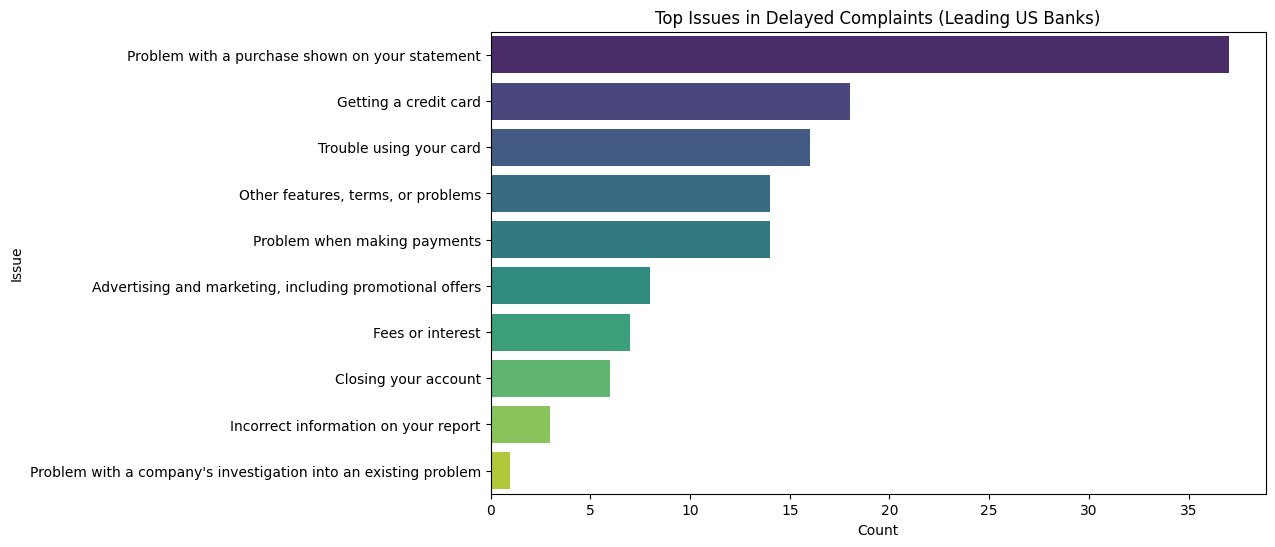

<ipython-input-72-71c79262f5e6>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sub_issues.values, y=top_sub_issues.index, palette='magma')


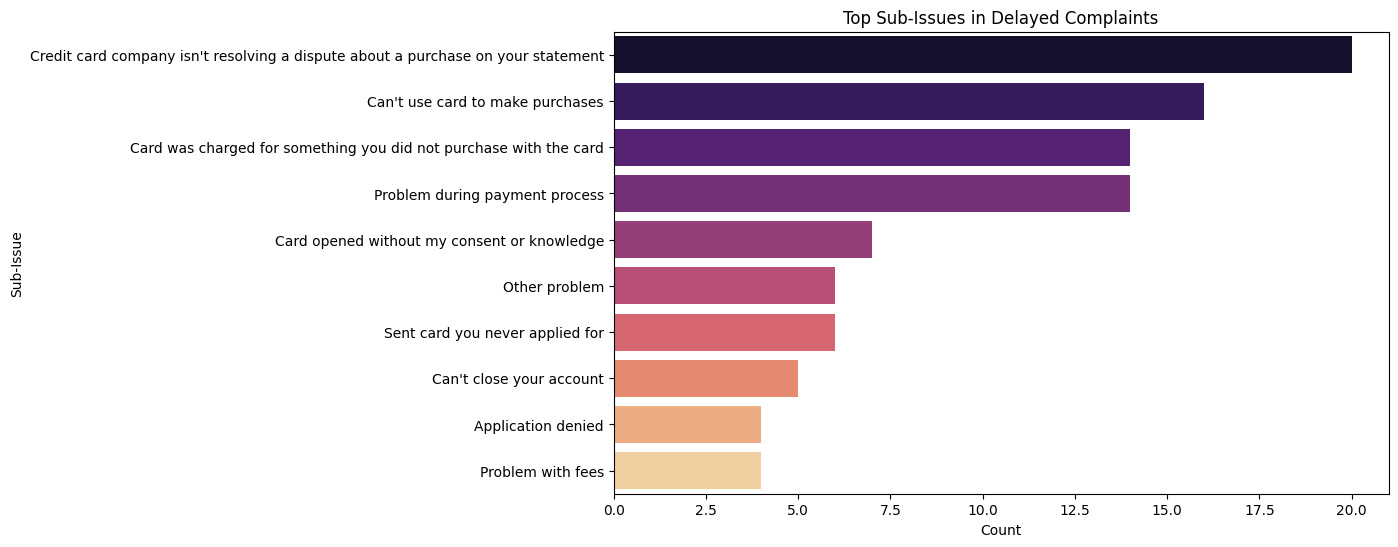

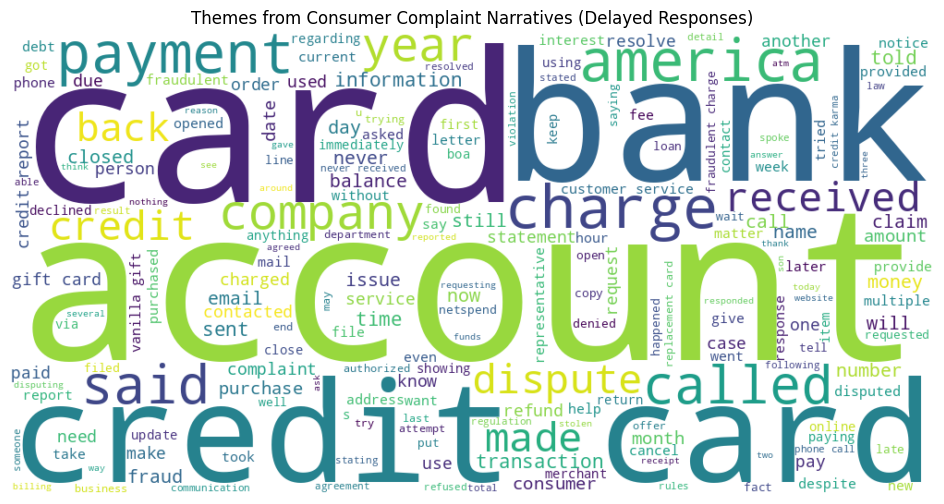

In [ ]:
# STEP 1: Filter delayed complaints
delayed_df = df[df['Timely response?'] == 'No']

# STEP 2: Focus on top US banks
delayed_leading = delayed_df[delayed_df['Company'].isin(leading_banks)]

# STEP 3: Count number of delayed complaints by bank (ascending order)
bank_delay_counts = delayed_leading['Company'].value_counts().sort_values().reset_index()
bank_delay_counts.columns = ['Company', 'Delayed_Complaints']
bank_delay_counts
# Display result
print(bank_delay_counts)

# STEP 4: Most common issues and sub-issues
top_issues = delayed_leading['Issue'].value_counts().head(10)
top_sub_issues = delayed_leading['Sub-issue'].value_counts().head(10)

# Visualize issues
plt.figure(figsize=(10, 6))
sns.barplot(x=top_issues.values, y=top_issues.index, palette='viridis')
plt.title('Top Issues in Delayed Complaints (Leading US Banks)')
plt.xlabel('Count')
plt.ylabel('Issue')
plt.show()

# Visualize sub-issues
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sub_issues.values, y=top_sub_issues.index, palette='magma')
plt.title('Top Sub-Issues in Delayed Complaints')
plt.xlabel('Count')
plt.ylabel('Sub-Issue')
plt.show()

# STEP 5: WordCloud of cleaned complaint text
text = ' '.join(delayed_leading['cleaned_complaint'].dropna())

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Themes from Consumer Complaint Narratives (Delayed Responses)')
plt.show()


#Task 6

In [ ]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,day_number,cleaned_complaint
0,2023-08-25,Credit card,General-purpose credit card or charge card,Getting a credit card,Card opened without my consent or knowledge,"On XX/XX/23, Someone applied for JPMCB w/o my ...",NaN,JPMORGAN CHASE & CO.,IL,62234,Servicemember,Consent provided,Web,08/25/23,Closed with explanation,Yes,NaN,7454417,8,on someone applied for jpmcb w o my knowledge
1,2023-08-25,Credit card,General-purpose credit card or charge card,Problem with a company's investigation into an...,Was not notified of investigation status or re...,See the attached documents. I want the bureau ...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,GA,30134,NaN,Consent provided,Web,08/25/23,Closed with explanation,Yes,NaN,7455326,8,see the attached documents i want the bureau t...
2,2023-08-25,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,American Express has a platinum charge card of...,NaN,AMERICAN EXPRESS COMPANY,AZ,85037,NaN,Consent provided,Web,08/25/23,Closed with explanation,Yes,NaN,7454984,8,american express has a platinum charge card of...
3,2023-08-25,Credit card,General-purpose credit card or charge card,Problem with a company's investigation into an...,Was not notified of investigation status or re...,See the attached documents. I want the bureau ...,NaN,"EQUIFAX, INC.",GA,30134,NaN,Consent provided,Web,08/25/23,Closed with non-monetary relief,Yes,NaN,7455159,8,see the attached documents i want the bureau t...
4,2023-08-25,Credit card,Store credit card,"Advertising and marketing, including promotion...",Didn't receive advertised or promotional terms,I am writing to address a matter of utmost con...,Company has responded to the consumer and the ...,SYNCHRONY FINANCIAL,GA,30504,NaN,Consent provided,Web,08/31/23,Closed with monetary relief,Yes,NaN,7457397,8,i am writing to address a matter of utmost con...


In [ ]:
# pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.1 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

analyzer = SentimentIntensityAnalyzer()

# Apply sentiment scoring
def get_sentiment(row):
    score = analyzer.polarity_scores(row)
    compound = score['compound']
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['cleaned_complaint'].apply(get_sentiment)

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.8 MB/s eta 0:00:00


Average Resolution Time (Days) by Bank:
                                 Company  Avg Resolution Time (Negative)  \
0               AMERICAN EXPRESS COMPANY                        0.482143   
1  BANK OF AMERICA, NATIONAL ASSOCIATION                        0.564196   
2      CAPITAL ONE FINANCIAL CORPORATION                        0.387931   
3                          DISCOVER BANK                        0.188862   
4                   JPMORGAN CHASE & CO.                        0.421384   

   Avg Resolution Time (All)  
0                   0.571398  
1                   0.516275  
2                   0.474313  
3                   0.207385  
4                   0.413231  

Correlation between Negative Sentiment and Resolution Time:
                                    Bank  Correlation   P-Value  Sample Size
0                   JPMORGAN CHASE & CO.     0.002500  0.840283         6500
1                          DISCOVER BANK    -0.011818  0.540751         2681
2               AMERICAN 

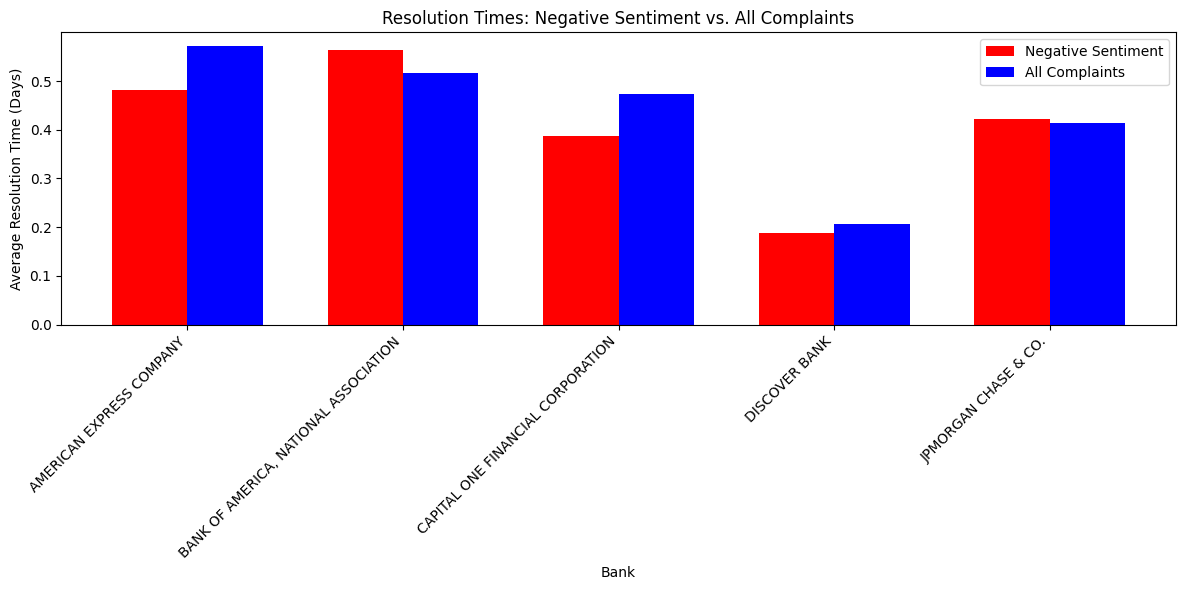

<ipython-input-6-fbf90a740e9e>:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='resolution_time', data=bank_data, palette='Set2')


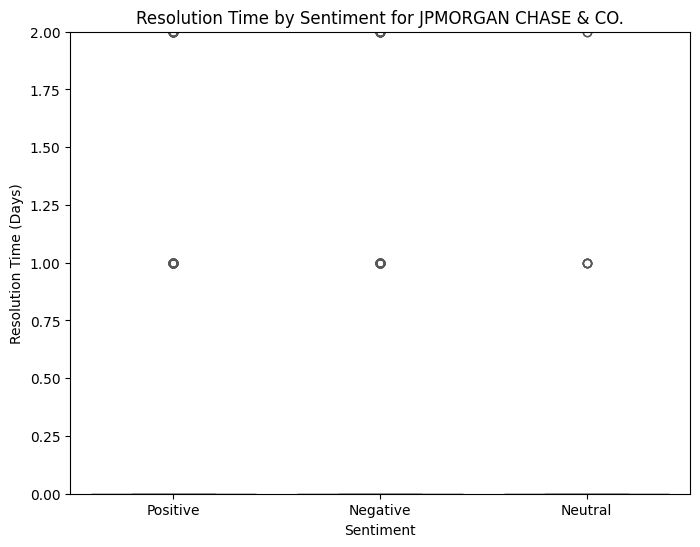

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np

# Load the dataset
# Replace 'complaints-2025-04-12_09_24.csv' with the correct path if needed
df = pd.read_csv('complaints-2025-04-12_09_24.csv')

# Convert date columns to datetime
df['Date received'] = pd.to_datetime(df['Date received'], format='%m/%d/%y', errors='coerce')
df['Date sent to company'] = pd.to_datetime(df['Date sent to company'], format='%m/%d/%y', errors='coerce')

# Calculate resolution time (in days)
df['resolution_time'] = (df['Date sent to company'] - df['Date received']).dt.days

# Filter out invalid resolution times (missing or negative)
df = df.dropna(subset=['resolution_time'])
df = df[df['resolution_time'] >= 0]

# Clean complaint narratives for sentiment analysis
def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    # Basic cleaning: remove special characters, numbers, and extra spaces
    text = ''.join(c for c in text if c.isalpha() or c.isspace())
    text = ' '.join(text.split())
    return text

df['cleaned_complaint'] = df['Consumer complaint narrative'].apply(clean_text)

# Perform sentiment analysis using VADER
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    if not text:  # Handle empty strings
        return 'Neutral'
    score = analyzer.polarity_scores(text)
    compound = score['compound']
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['cleaned_complaint'].apply(get_sentiment)

# Define major banks
major_banks = [
    'JPMORGAN CHASE & CO.',
    'DISCOVER BANK',
    'AMERICAN EXPRESS COMPANY',
    'CAPITAL ONE FINANCIAL CORPORATION',
    'BANK OF AMERICA, NATIONAL ASSOCIATION'
]

# Filter for major banks and complaints with valid narratives
df_banks = df[
    (df['Company'].isin(major_banks)) &
    (df['cleaned_complaint'] != '') &
    (df['Consumer complaint narrative'].notna())
]

# Analyze resolution times for negative sentiment vs. all complaints
# Average resolution time by bank for negative sentiment
avg_resolution_negative = df_banks[df_banks['sentiment'] == 'Negative'].groupby('Company')['resolution_time'].mean().reset_index()
avg_resolution_negative.columns = ['Company', 'Avg Resolution Time (Negative)']

# Average resolution time by bank for all complaints
avg_resolution_all = df_banks.groupby('Company')['resolution_time'].mean().reset_index()
avg_resolution_all.columns = ['Company', 'Avg Resolution Time (All)']

# Merge for comparison
resolution_comparison = pd.merge(
    avg_resolution_negative,
    avg_resolution_all,
    on='Company',
    how='outer'
).fillna(0)  # Fill NaN with 0 for banks with no negative complaints

# Display comparison
print("Average Resolution Time (Days) by Bank:")
print(resolution_comparison)

# Correlation analysis: Negative sentiment vs. resolution time
correlation_results = []
for bank in major_banks:
    bank_data = df_banks[df_banks['Company'] == bank][['resolution_time', 'sentiment']].dropna()
    if len(bank_data) < 2:  # Skip if insufficient data
        correlation_results.append({
            'Bank': bank,
            'Correlation': np.nan,
            'P-Value': np.nan,
            'Sample Size': len(bank_data)
        })
        continue

    # Binary variable: 1 for Negative, 0 for Positive/Neutral
    bank_data['is_negative'] = (bank_data['sentiment'] == 'Negative').astype(int)

    # Pearson correlation
    corr, p_value = pearsonr(bank_data['is_negative'], bank_data['resolution_time'])
    correlation_results.append({
        'Bank': bank,
        'Correlation': corr,
        'P-Value': p_value,
        'Sample Size': len(bank_data)
    })

# Convert to DataFrame
corr_df = pd.DataFrame(correlation_results)

# Display correlation results
print("\nCorrelation between Negative Sentiment and Resolution Time:")
print(corr_df)

# Visualization 1: Bar plot comparing resolution times
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(resolution_comparison))

plt.bar(index, resolution_comparison['Avg Resolution Time (Negative)'], bar_width, label='Negative Sentiment', color='red')
plt.bar(index + bar_width, resolution_comparison['Avg Resolution Time (All)'], bar_width, label='All Complaints', color='blue')

plt.xlabel('Bank')
plt.ylabel('Average Resolution Time (Days)')
plt.title('Resolution Times: Negative Sentiment vs. All Complaints')
plt.xticks(index + bar_width/2, resolution_comparison['Company'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Visualization 2: Box plot for an example bank
example_bank = 'JPMORGAN CHASE & CO.'
if example_bank in df_banks['Company'].values:
    bank_data = df_banks[df_banks['Company'] == example_bank]
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='sentiment', y='resolution_time', data=bank_data, palette='Set2')
    plt.title(f'Resolution Time by Sentiment for {example_bank}')
    plt.xlabel('Sentiment')
    plt.ylabel('Resolution Time (Days)')
    plt.ylim(0, bank_data['resolution_time'].quantile(0.95))  # Limit y-axis to avoid outliers
    plt.show()
else:
    print(f"No data available for {example_bank} with valid complaints.")

In [ ]:
print(bank_data['sentiment'].value_counts())

sentiment
Neutral     11820
Positive     3577
Negative     2659
Name: count, dtype: int64


Adjusted plot for the same

<ipython-input-16-1b857d44abf0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='resolution_time', data=bank_data, palette='Set2')


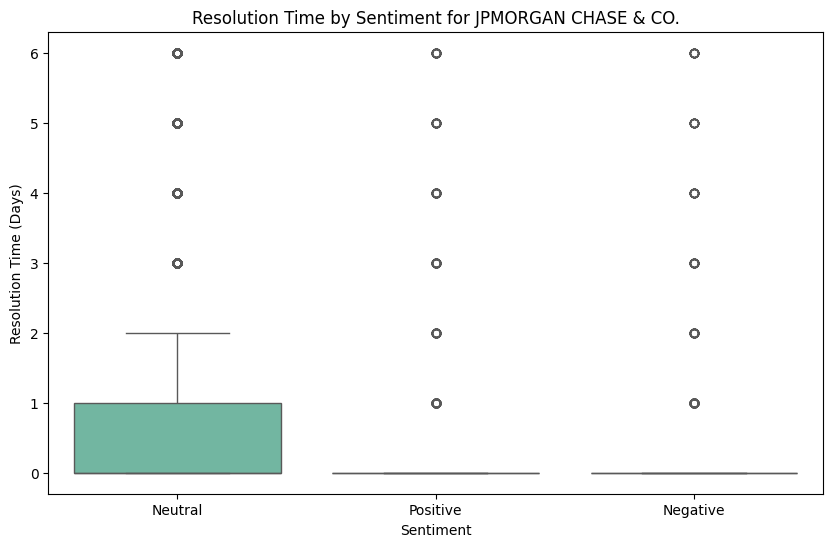

Statistics for JPMORGAN CHASE & CO.:
             count      mean       std  min  25%  50%  75%  max
sentiment                                                      
Negative    2659.0  0.139526  0.695908  0.0  0.0  0.0  0.0  6.0
Neutral    11820.0  0.948308  1.625257  0.0  0.0  0.0  1.0  6.0
Positive    3577.0  0.176964  0.821785  0.0  0.0  0.0  0.0  6.0


In [ ]:
# Generate box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='resolution_time', data=bank_data, palette='Set2')
plt.title(f'Resolution Time by Sentiment for {bank_name}')
plt.xlabel('Sentiment')
plt.ylabel('Resolution Time (Days)')
# Adjust or remove ylim for better visibility
#plt.ylim(0, resolution_cap * 1.1)  # Consider removing or adjusting this
plt.show()  # Display the plot
# Optional: Print basic statistics for verification
print(f"Statistics for {bank_name}:")
print(bank_data.groupby('sentiment')['resolution_time'].describe())